In [7]:
from collections import Counter
import os,re,string,json
from tqdm import tqdm
import pandas as pd
import datetime
import nltk


from functions import *

plotting.style_()


tf = pd.read_csv(base_path + '/resources/keywords-expertise-translation.csv')
tf_science = {language:dict(zip(tf[tf['language'] == language]['word'],tf[tf['language'] == language]['translation'])) for language in list(set(tf['language']))}
tf_science = {k:{x:i for x,i in v.items() if x not in ["policy","program","measures"]} for k,v in tf_science.items()}

In [8]:
def load_clean(iso='gb',start_month='2020-01',end_month='2020-12',text_version='lemmatized'):
    df = data_loader.load_month(iso,start_month,end_month)
    df['text'] = [utils.preprocess(str(x)) for x in df[text_version]]
    return df 

In [10]:
df = data_loader.load_month('gb','2019-10','2020-09')
df = df[df['text'].notna()]
df = df.drop_duplicates().reset_index(drop=True)
df = df[df['text'].astype(str).str.contains("|".join(list(tf_science['gb'].values())))].reset_index(drop=True)

In [15]:
sentences = []

for i in df['text']:
    sts = nltk.sent_tokenize(i)
    sts = [x for x in sts if any(n in x for n in tf_science['gb'].values())]
    if len(sts) != 0:
        for x in sts:
            sentences.append(sts)

In [16]:
sentences

s and does some groundbreaking work in terms of establishing targets on water, air, plastics, biodiversity and so on.'],
 ['Member for Truro and Falmouth (Sarah Newton) talked about the need for objective information, which is so important if people are going to make these provisions stick.'],
 ['We much value the experience and expertise of my right hon.'],
 ['The date of 12 December is mentioned in the information that I have received from the Leader of the House.'],
 ['Gentleman, who speaks with some knowledge on these matters, is dissatisfied with the amount of debate that there has been.'],
 ['The Secretary of State will be well aware—because, of course, he wrote it—of the statement in the foreword to the consultation paper on the victims payment scheme that “as a society we have a moral duty” —a moral duty— “to acknowledge and recognise the unacceptable suffering of those seriously injured in the Troubles” Surely to goodness, the Secretary of State accepts that we as a society ha

In [19]:
df = df[['week','posner']]
df = df.groupby(["week"]).agg({"posner": lambda x: " ".join(x)}).reset_index()
pos = dict(zip(df['week'],df['posner']))
pos = {k:[w for w in v.split(' ') if "_" in w] for k,v in pos.items()}
pos = {k:[w.split('_')[1] for w in v] for k,v in pos.items()}

In [29]:
rdf = []

for week,pos_ in pos.items():
    d_ = dict(Counter(pos_))
    sum_ = sum(d_.values())
    for x,v in d_.items():
        rdf.append([week,x,v / sum_])

In [30]:
rdf = pd.DataFrame(rdf,columns=['week','pos','f']).pivot(index='week',columns='pos',values='f')

<AxesSubplot:xlabel='week'>

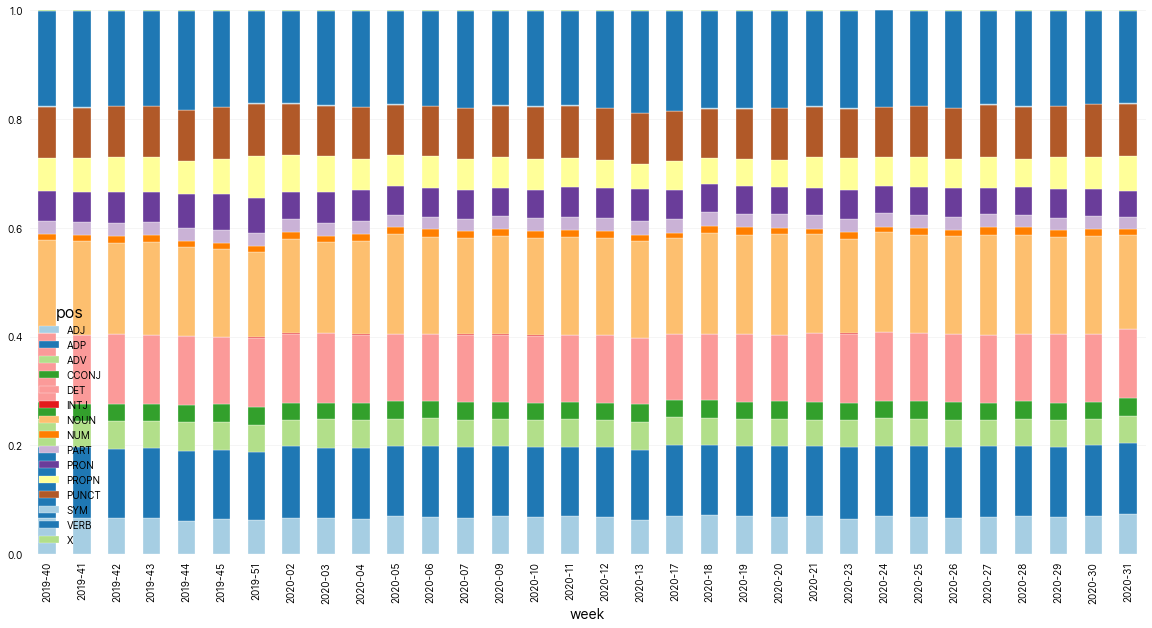

In [35]:
rdf.reset_index().plot.bar(x='week',y=list(rdf.columns),stacked=True,figsize=(20,10))